In [1]:
import os

In [2]:
from transformers import Wav2Vec2Processor, Data2VecAudioModel
import torch
from torch import nn
from datasets import load_dataset
import numpy
import pandas
import seaborn
from sklearn import cluster

In [3]:
dataset = load_dataset("hf-internal-testing/librispeech_asr_demo", "clean", split="validation", trust_remote_code=True)
dataset = dataset.sort("id")
sampling_rate = dataset.features["audio"].sampling_rate

In [4]:
d = './data_mp3/'
listed = [os.path.abspath('{0}{1}'.format(d, x)) for x in os.listdir(d)]
listed

['C:\\Users\\Edward\\Desktop\\music\\data_mp3\\-PVZWsClTPY.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\0j7_Tb4LgPA.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\0poLsDf1TvM.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\1AfkQES9PPw__ы1.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\1AfkQES9PPw__ы10.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\1AfkQES9PPw__ы11.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\1AfkQES9PPw__ы12.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\1AfkQES9PPw__ы13.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\1AfkQES9PPw__ы14.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\1AfkQES9PPw__ы15.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\1AfkQES9PPw__ы16.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\1AfkQES9PPw__ы17.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\1AfkQES9PPw__ы18.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\1AfkQES9PPw__ы19.mp3',
 'C:\\Users\\Edward\\Desktop\\music\

In [5]:
from datasets import Dataset, Audio

In [6]:
# https://huggingface.co/docs/datasets/en/audio_dataset

audio_dataset = Dataset.from_dict({"audio": listed}).cast_column("audio", Audio(sampling_rate=16000))
# audio_sampling_rate = 44100
audio_sampling_rate = 16000
audio_dataset[3]["audio"]

{'path': 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\1AfkQES9PPw__ы1.mp3',
 'array': array([0.        , 0.        , 0.        , ..., 0.14189927, 0.14596349,
        0.17021483]),
 'sampling_rate': 16000}

In [7]:
processor = Wav2Vec2Processor.from_pretrained("facebook/data2vec-audio-base-960h")

In [8]:
model = Data2VecAudioModel.from_pretrained("m-a-p/music2vec-v1")

In [9]:
audio_dataset[0]

{'audio': {'path': 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\-PVZWsClTPY.mp3',
  'array': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.69366976e-04, -1.44117323e-04, -9.60745892e-05]),
  'sampling_rate': 16000}}

In [10]:
inputs = processor(audio_dataset[0]["audio"]["array"], sampling_rate=audio_sampling_rate, return_tensors="pt")
inputs

{'input_values': tensor([[-0.0003, -0.0003, -0.0003,  ..., -0.0007, -0.0007, -0.0005]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], dtype=torch.int32)}

In [ ]:
aggregator = nn.Conv1d(in_channels=13, out_channels=1, kernel_size=1)
produced, idss, paths, vs = [], [], [], []
with torch.no_grad():
    for j in range(len(audio_dataset)):
        print('{0} / {1}'.format(j, len(audio_dataset)))
        inputs = processor(audio_dataset[j]["audio"]["array"], sampling_rate=audio_sampling_rate, return_tensors="pt")
        outputs = model(**inputs, output_hidden_states=True)
        del inputs
        all_layer_hidden_states = torch.stack(outputs.hidden_states).squeeze()
        del outputs
        time_reduced_hidden_states = all_layer_hidden_states.mean(-2)
        del all_layer_hidden_states
        weighted_avg_hidden_states = aggregator(time_reduced_hidden_states).squeeze()
        del time_reduced_hidden_states
        pp = weighted_avg_hidden_states.reshape(1, -1)
        del weighted_avg_hidden_states
        produced.append(pp)
        ids = ''
        path = audio_dataset[j]["audio"]["path"]
        if '__ы' in path:
            v = path[path.index('__ы') + len('__ы'):path.index('.mp3')]
        else:
            v = '0'
        vs.append(v)
        idss.append(ids)
        paths.append(path)
produced_torch = torch.cat(produced, dim=0)
produced_torch

0 / 807
1 / 807
2 / 807
3 / 807
4 / 807
5 / 807
6 / 807
7 / 807
8 / 807
9 / 807
10 / 807
11 / 807
12 / 807
13 / 807
14 / 807
15 / 807
16 / 807
17 / 807
18 / 807
19 / 807
20 / 807
21 / 807
22 / 807
23 / 807
24 / 807
25 / 807
26 / 807
27 / 807
28 / 807
29 / 807
30 / 807
31 / 807
32 / 807
33 / 807
34 / 807
35 / 807
36 / 807
37 / 807
38 / 807
39 / 807
40 / 807
41 / 807
42 / 807
43 / 807
44 / 807
45 / 807
46 / 807
47 / 807
48 / 807
49 / 807
50 / 807
51 / 807
52 / 807
53 / 807
54 / 807
55 / 807
56 / 807
57 / 807
58 / 807
59 / 807
60 / 807
61 / 807
62 / 807
63 / 807
64 / 807
65 / 807
66 / 807
67 / 807
68 / 807
69 / 807
70 / 807
71 / 807
72 / 807
73 / 807
74 / 807
75 / 807
76 / 807
77 / 807
78 / 807
79 / 807
80 / 807
81 / 807
82 / 807
83 / 807
84 / 807
85 / 807
86 / 807
87 / 807
88 / 807
89 / 807
90 / 807
91 / 807
92 / 807
93 / 807
94 / 807
95 / 807
96 / 807
97 / 807
98 / 807
99 / 807
100 / 807
101 / 807
102 / 807
103 / 807
104 / 807
105 / 807
106 / 807


In [ ]:
produced_torch = torch.cat(produced, dim=0)
produced_torch = produced_torch.numpy()
produced_torch

In [59]:
import umap
import hdbscan

In [60]:
mapper = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
)

clusterable_embedding = mapper.fit_transform(produced_torch)

In [61]:
scanner = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
)

labels = scanner.fit_predict(clusterable_embedding)

In [62]:
scanner = cluster.KMeans(n_clusters=3)

labels = scanner.fit_predict(clusterable_embedding)

In [63]:
data = pandas.DataFrame(data=clusterable_embedding, columns=['x1', 'x2'])
data['labels'] = labels
data['id'] = idss
data['path'] = paths
data['vs'] = vs
data

,x1,x2,labels,id,path
0,-3.054098,-1.577676,0,,C:\Users\Edward\Desktop\music\data_sub_mp3\0po...
1,-3.910137,-1.826775,1,,C:\Users\Edward\Desktop\music\data_sub_mp3\9gM...
2,-3.373260,-0.658194,2,,C:\Users\Edward\Desktop\music\data_sub_mp3\sKq...
3,-3.388057,-2.353068,1,,C:\Users\Edward\Desktop\music\data_sub_mp3\xLe...


<Axes: xlabel='x1', ylabel='x2'>

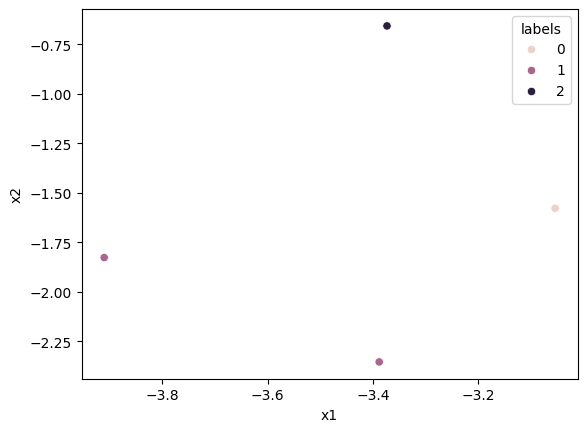

In [64]:
seaborn.scatterplot(data=data, x="x1", y="x2", hue="labels")

In [65]:
data.to_excel('labeled.xlsx')

In [23]:
dataset[0]["audio"]["path"]

'C:/Users/Edward/.cache/huggingface/datasets/downloads/extracted/5bcdfe32bf897be9d35b8459d665a1979e1388392378913b3c587390c05864c3/dev_clean/1272/128104\\1272-128104-0000.flac'

In [24]:
dataset[0]['id']

'1272-128104-0000'